In [ ]:
---
skip_exec: true
title: Testing cross-reference with holoviews charts
author: "Luis R. Gonzalez"
date: 'Aug 20, 2022'
format:
    html:
        code-fold: true
output-file: cross.html
description: Testing cross reference with holoviews
---

In [ ]:
#|hide
import pandas as pd
from sklearn.datasets import load_iris
from pandas import util
import seaborn as sns


In [ ]:
#|hide
pd.options.plotting.backend = "holoviews"

In [ ]:
#|hide
data = load_iris()

In [ ]:
#|hide
df = util.testing.makeTimeDataFrame()

In [ ]:
#|hide
df.head()

,A,B,C,D
2000-01-03,-0.291957,-0.923182,-0.387196,0.897297
2000-01-04,0.212455,-1.286525,1.032240,-0.737662
2000-01-05,-0.332210,-0.791702,1.369220,-1.734191
2000-01-06,0.205946,0.333977,-1.025933,0.023883
2000-01-07,-0.794877,-0.937598,-0.474339,0.194101


In [ ]:
#|hide
df.reset_index().rename(columns={'index':'Date'}).groupby([pd.Grouper(key='Date',freq='w-MON')]).sum()

,A,B,C,D
Date,,,,
2000-01-03,-0.291957,-0.923182,-0.387196,0.897297
2000-01-10,-0.968206,-3.514112,-0.716844,-3.234484
2000-01-17,-0.115015,1.922420,2.627215,-1.233115
2000-01-24,-1.258900,-3.223871,1.914137,-1.200373
2000-01-31,0.293817,-3.359759,-1.887466,-1.170383
2000-02-07,0.367655,0.214467,-0.210336,-2.582253
2000-02-14,1.956214,0.516000,2.551510,-0.686762


In [ ]:
#|hide
df = df.assign(max_value = df.max(axis=1))

In [ ]:
#|hide
def classify(df):
    if df['max_value'] >= 1:
        return 'High'
    if df['max_value'] > 0.5 and df['max_value'] < 1:
        return 'Medium'
    if df['max_value'] < 0.5:
        return 'Low'

In [ ]:
#|hide
df = df.assign(Category = df.apply(classify,axis=1))

In [ ]:
#|hide
df['Category'] = df['Category'].astype("category")

In [ ]:
#|hide
df

,A,B,C,D,max_value,Category
2000-01-03,-0.291957,-0.923182,-0.387196,0.897297,0.897297,Medium
2000-01-04,0.212455,-1.286525,1.032240,-0.737662,1.032240,High
2000-01-05,-0.332210,-0.791702,1.369220,-1.734191,1.369220,High
2000-01-06,0.205946,0.333977,-1.025933,0.023883,0.333977,Low
2000-01-07,-0.794877,-0.937598,-0.474339,0.194101,0.194101,Low
2000-01-10,-0.259520,-0.832264,-1.618033,-0.980615,-0.259520,Low
2000-01-11,-0.633506,-0.761909,-0.290172,0.393735,0.393735,Low
2000-01-12,-1.099575,1.856906,0.572240,-1.221087,1.856906,High
2000-01-13,-0.610795,-0.202522,0.873890,0.469073,0.873890,Medium
2000-01-14,0.015273,0.692001,1.250463,-1.079942,1.250463,High


See @fig-plot

In [ ]:
#| echo: false
#| label: fig-plot
#| fig-cap: Holoviews example
df.plot(by='Category',subplots=True).cols(2)

:NdLayout   [Variable]
   :Curve   [index]   (value)

<seaborn.axisgrid.PairGrid>

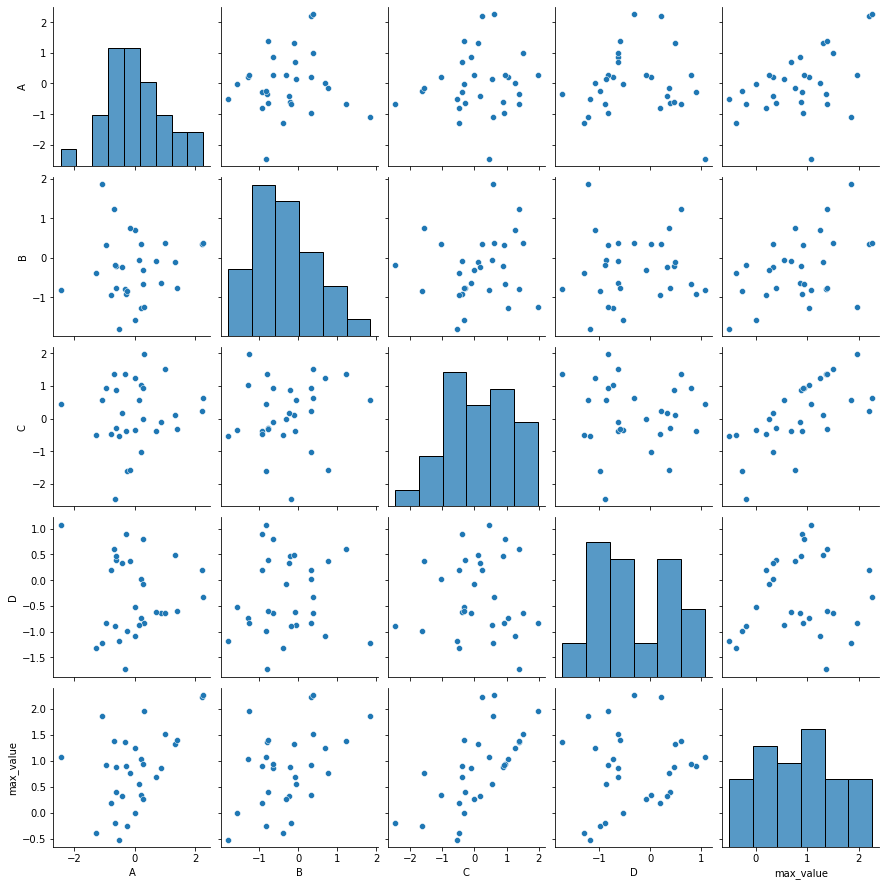

In [ ]:
#| echo: false
#| label: fig-pairplot
#| fig-cap: Seaborn pairplot example
sns.pairplot(df);